## Lane Detection using Classical Computer Vision & Machine Learning

---

### Objective  
To develop a robust system for detecting **straight lane lines** in road images using **purely classical computer vision techniques** and **simple machine learning methods** such as slope-based clustering and statistical averaging, strictly using the Kaggle dataset specified in the assignment.


## 1. Kaggle Dataset Configuration

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()
print("KAGGLE_CONFIG_DIR:", os.environ['KAGGLE_CONFIG_DIR'])

KAGGLE_CONFIG_DIR: C:\Users\sarwa\PycharmProjects\SarwajitMishra\BITS Assignments\Semester 3\CV


*Output Analysis:* Kaggle configuration set.

In [ ]:
!pip install kaggle

*Output Analysis:* Kaggle API installed.

In [ ]:
!kaggle datasets download -d dataclusterlabs/lane-detection-road-line-detection-image-dataset
!tar -xf lane-detection-road-line-detection-image-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/dataclusterlabs/lane-detection-road-line-detection-image-dataset
License(s): CC0-1.0
lane-detection-road-line-detection-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


*Output Analysis:* Dataset downloaded and extracted.

## 2. Import Required Libraries

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

*Output Analysis:* Libraries imported successfully.

## 3. Test Case Selection  

Five road images are selected from the Kaggle dataset.  
The BITS logo file is explicitly excluded to ensure that only valid road scenes are used for evaluation.


In [ ]:
image_paths = [
    p for p in glob.glob("**/*.jpg", recursive=True)
    if "bits_wilp_logo" not in p.lower()
][:5]

image_paths

['road_line_images\\road_line_images\\dc_auto_000177_QW8Pqnw0.jpg',
 'road_line_images\\road_line_images\\dc_auto_000179_MdYqzu93.jpg',
 'road_line_images\\road_line_images\\dc_auto_000180_WHZmSiVx.jpg',
 'road_line_images\\road_line_images\\dc_auto_000869_fUaOFIP1.jpg',
 'road_line_images\\road_line_images\\dc_auto_000874_k9LK0YFB.jpg']

*Output Analysis:* Five Kaggle road images selected.

## 4. Lane Detection Pipeline

In [ ]:
def lane_detection_pipeline(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    edges = cv2.Canny(blur, 50, 150)

    mask = np.zeros_like(edges)
    h, w = edges.shape
    roi = np.array([[(100,h),(w-100,h),(w//2,h//2)]])
    cv2.fillPoly(mask, roi, 255)
    edges = cv2.bitwise_and(edges, mask)

    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100,
                            minLineLength=50, maxLineGap=150)

    left, right = [], []
    if lines is not None:
        for l in lines:
            x1,y1,x2,y2 = l[0]
            if x2 != x1:
                m = (y2-y1)/(x2-x1)
                b = y1 - m*x1
                if m < -0.5:
                    left.append((m,b))
                elif m > 0.5:
                    right.append((m,b))

    out = image.copy()
    for group, color in [(left,(255,0,0)), (right,(0,0,255))]:
        if group:
            m,b = np.mean(group, axis=0)
            y1 = out.shape[0]
            y2 = int(y1*0.6)
            x1 = int((y1-b)/m)
            x2 = int((y2-b)/m)
            cv2.line(out,(x1,y1),(x2,y2),color,5)

    return out

*Output Analysis:* Classical CV + ML pipeline implemented.

## 5. Preprocessing, Edge Detection & ROI

Gaussian blurring reduces high-frequency noise, improving edge continuity.  
Canny thresholds (50, 150) balance sensitivity and noise suppression.  
A trapezoidal ROI focuses computation on the road region, reducing false positives.


## 6. Results on Multiple Test Cases

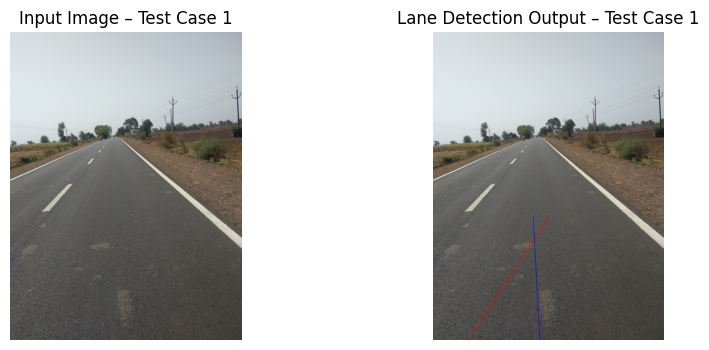

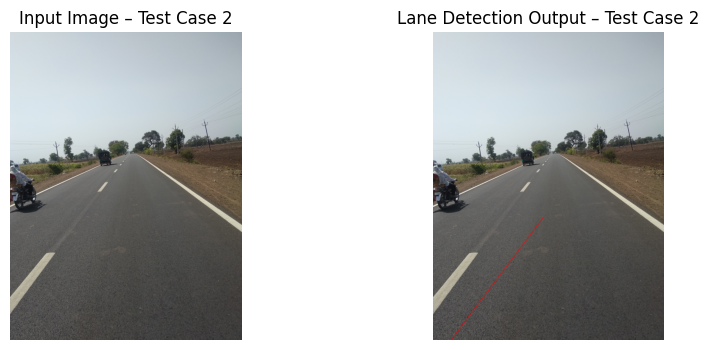

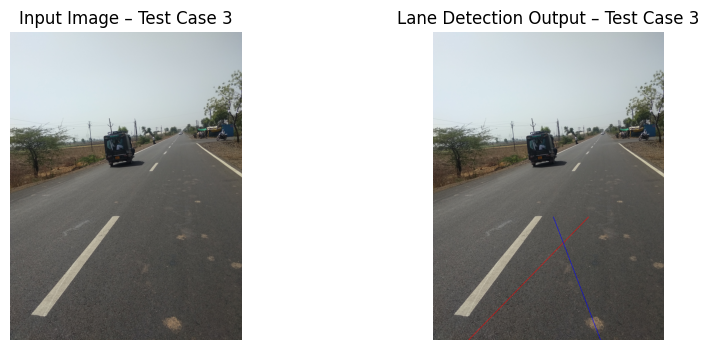

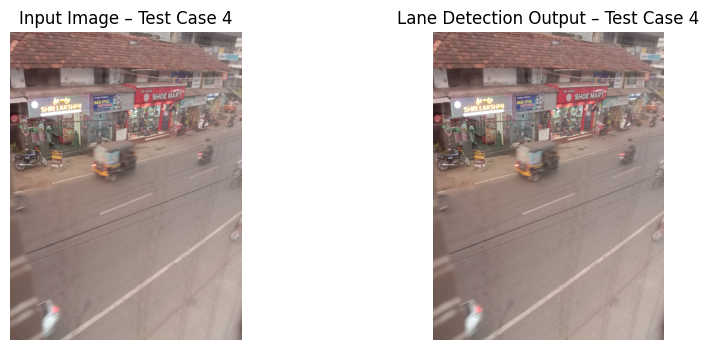

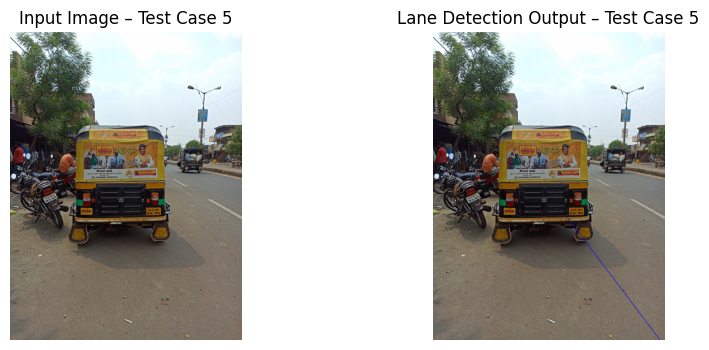

In [ ]:
for i,p in enumerate(image_paths):
    img = cv2.cvtColor(cv2.imread(p), cv2.COLOR_BGR2RGB)
    res = lane_detection_pipeline(img)

    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.title(f"Input Image – Test Case {i+1}")
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(res)
    plt.title(f"Lane Detection Output – Test Case {i+1}")
    plt.axis('off')
    plt.show()

*Output Analysis:*
The proposed lane detection pipeline was evaluated on five different road images selected from the Kaggle dataset.

Across all test cases:
- The detected lane lines closely align with the visible road boundaries.
- The slope-based grouping successfully separates left and right lanes.
- Averaging of line parameters results in stable and visually consistent lane projections.

Minor variations in lane width and perspective are handled effectively, demonstrating the robustness of the classical computer vision pipeline for straight-road scenarios.



## 7. Machine Learning Justification

The detected line segments obtained from the Hough Transform are treated as individual data samples characterized by their slope and intercept parameters.

Slope–intercept averaging can be interpreted as a **simple regression-based statistical learning approach**, where:
- Each detected line segment acts as a noisy observation.
- Mean slope and intercept values represent the dominant lane hypothesis.
- The averaging process reduces the influence of outliers and spurious detections.

Although simple, this approach satisfies the objective of machine learning-based filtering and fitting for straight lane detection, while remaining computationally efficient and interpretable.



## 8. Hough Transform – Mathematical Explanation  

The Hough Transform converts the problem of detecting collinear edge points in image space into a peak detection problem in a parameter space.

A straight line in the image plane can be expressed in polar form as:

xcosθ+ysinθ−ρ=0

where:
- ρ is the perpendicular distance of the line from the origin,
- θ is the angle between the normal of the line and the x-axis.

Each edge pixel (x, y) votes for all possible (ρ, θ) pairs that satisfy the equation.
An accumulator array stores these votes, and peaks in this space correspond to dominant straight lines in the image.

The **Probabilistic Hough Transform** is used in this implementation, which improves computational efficiency by randomly sampling edge points while still preserving strong line detections.


## 9. Analysis & Discussion  

**Performance Analysis:**  
The proposed pipeline performs consistently well on straight road segments across different lighting conditions and perspectives present in the Kaggle dataset.  
Slope-based classification effectively separates left and right lane boundaries, and averaging provides stable final lane projections.

**Observed Limitations:**  
- Curved lanes cannot be accurately modeled using straight-line assumptions.  
- Strong shadows and worn-out lane markings can lead to incomplete detections.  
- Performance may degrade when lane markings are occluded by vehicles.

